In [1]:
import pandas as pd
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt
import numpy as np
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [2]:
df = pd.read_csv("../input/ultimate-spotify-tracks-db/SpotifyFeatures.csv")
display(df.head())

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# Prints the names of the features
print(df.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [4]:
# Let's check for null values
print(pd.isnull(df).sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


Text(0.5, 1.0, 'Time Signature Distribution')

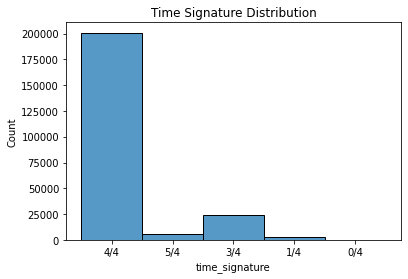

In [5]:
# There are no null values, thus there's no need to perform any kind of operation
# in order to handle the missing values
sns.histplot(df['time_signature']).set_title('Time Signature Distribution')

Tracks with a 0/4 time signature: 8


Text(0.5, 1.0, 'Time Signature Distribution')

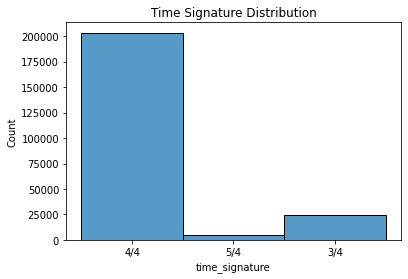

In [6]:
# The samples in the dataframe where the field 'time_signature' is '1/4'
# actually represent songs with mostly a 4/4 time signature, since it is
# most likely an error by who created the dataframe we're going to change it
# to the '4/4' value
df['time_signature'] = df['time_signature'].replace(['1/4'],'4/4')

print("Tracks with a 0/4 time signature: %s" % len(df[df['time_signature'] == '0/4']));
# Since there are just 8 samples with a '0/4' time signature,
# and since it is clearly an error, I'm going to simply delete them
df = df[df['time_signature'] != '0/4']

sns.histplot(df['time_signature']).set_title('Time Signature Distribution')

Text(0.5, 1.0, 'Genre Distribution')

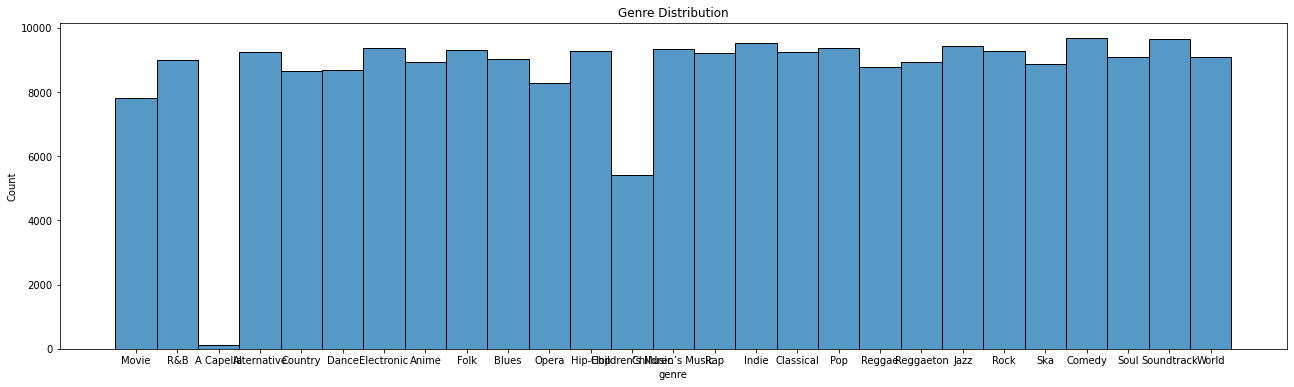

In [7]:
plt.figure(figsize=(22, 6))
sns.histplot(df['genre']).set_title('Genre Distribution')

Classical Tracks number: 9256
Pop Tracks number: 9385
Folk Tracks number: 9299
Total Tracks number: 27940


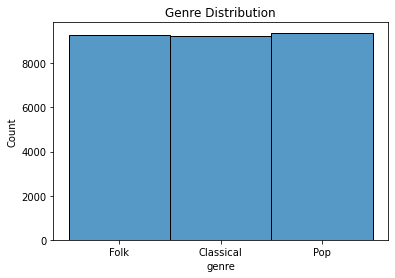

In [8]:
# i'm going to pick the three genres of the Philip Tagg's axiomatic triangle:
# Classical, Pop and Folk, as we can see they are pretty balanced

taggGenres = ['Classical','Pop','Folk']
df = df[df.genre.isin(taggGenres)];
sns.histplot(df['genre']).set_title('Genre Distribution')

print("Classical Tracks number: %s" % len(df[df['genre'] == 'Classical']));
print("Pop Tracks number: %s" % len(df[df['genre'] == 'Pop']));
print("Folk Tracks number: %s" % len(df[df['genre'] == 'Folk']));

print("Total Tracks number: %s" % len(df));

In [9]:
new_df = df.drop(['artist_name','track_name','track_id','popularity','key','mode','duration_ms'],axis = 1)
from sklearn.utils import shuffle
new_df = shuffle(new_df)
display(new_df.head())

,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
127947,Classical,0.99000,0.307,0.0495,0.902000,0.0713,-26.673,0.0402,135.213,4/4,0.233
111974,Pop,0.17900,0.568,0.7320,0.000005,0.4010,-4.896,0.1030,186.048,4/4,0.626
104724,Classical,0.99000,0.552,0.3700,0.729000,0.1530,-20.085,0.0771,112.917,4/4,0.880
109266,Pop,0.00217,0.669,0.7110,0.000000,0.4660,-6.758,0.0330,110.010,4/4,0.544
149285,Pop,0.01240,0.687,0.8290,0.000000,0.1070,-4.204,0.2600,133.854,4/4,0.154


In [10]:
features = new_df.keys().drop(['genre']);
display(features)

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
       'valence'],
      dtype='object')

In [11]:
new_df.genre = new_df.genre.map( {'Classical':0 , 'Pop':1, 'Folk':2} )
new_df.time_signature = new_df.time_signature.map( {'3/4':3 , '4/4':4, '5/4':5} )
training = new_df.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['genre']
X_test = new_df.drop(training.index)[features]
y_test = new_df.drop(training.index)['genre']
display(X_train.head())
display(y_train.head())

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
43273,0.0836,0.613,0.7160,0.000381,0.1050,-9.365,0.0261,112.588,4,0.5070
125052,0.9120,0.393,0.3000,0.894000,0.8430,-18.548,0.0417,114.765,4,0.1820
64032,0.8620,0.364,0.1260,0.000203,0.0969,-18.071,0.0286,90.429,4,0.4300
129193,0.9840,0.215,0.0688,0.518000,0.1370,-20.354,0.0453,87.014,4,0.0959
113672,0.2190,0.851,0.4060,0.000006,0.0853,-11.631,0.0661,97.840,4,0.7920


43273     2
125052    0
64032     2
129193    0
113672    1
Name: genre, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

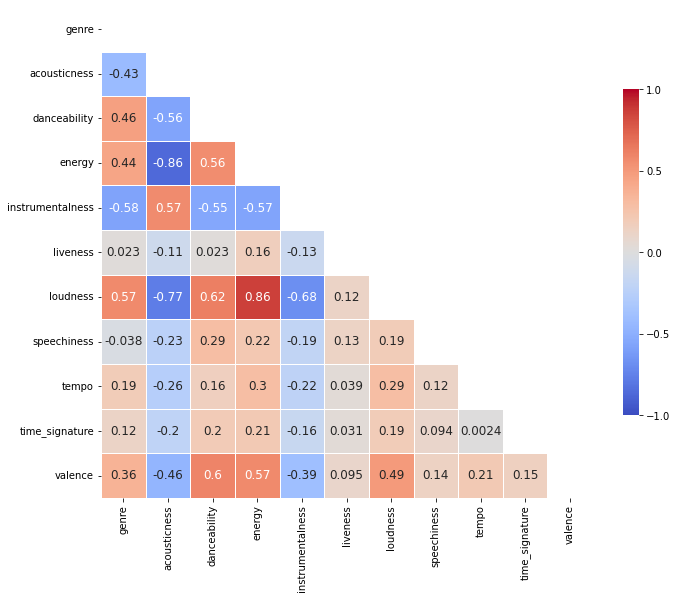

In [13]:
corr_heatmap(new_df)

In [14]:
# Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
param_grid = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg', 'sag', 'saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [15]:
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(LogisticRegression(multi_class = 'multinomial'), param_grid = param_grid, verbose=10, n_jobs=-1, error_score="raise")
#best_clf = clf.fit(X_train, y_train)

In [16]:
#print(best_clf.best_estimator_)
#print(best_clf.cv_results_)
#print (f'Accuracy - : {best_clf.score(X_train, y_train):.3f}')
# Thanks to GridSearch we know that the best choice is LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg')

In [17]:
model = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(C=11.288378916846883, multi_class='multinomial',
                   solver='newton-cg')

In [18]:
y_pred = model.predict(X_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1488
           1       0.79      0.79      0.79      1518
           2       0.72      0.72      0.72      1465

    accuracy                           0.80      4471
   macro avg       0.80      0.80      0.80      4471
weighted avg       0.80      0.80      0.80      4471



In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(new_df.drop(columns=['genre', 'loudness']),new_df['genre'], test_size=0.2, random_state=1)
lrm_cor = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1823
           1       0.76      0.75      0.76      1909
           2       0.69      0.72      0.70      1856

    accuracy                           0.78      5588
   macro avg       0.78      0.78      0.78      5588
weighted avg       0.78      0.78      0.78      5588



In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(new_df.drop(columns=['genre', 'energy']),new_df['genre'], test_size=0.2, random_state=1)
lrm_cor = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1823
           1       0.79      0.80      0.79      1909
           2       0.73      0.75      0.74      1856

    accuracy                           0.81      5588
   macro avg       0.81      0.81      0.81      5588
weighted avg       0.81      0.81      0.81      5588



In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(new_df.drop(columns=['genre', 'acousticness']),new_df['genre'], test_size=0.2, random_state=1)
lrm_cor = LogisticRegression(C=11.288378916846883, multi_class='multinomial',solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_valid, lrm_cor.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1823
           1       0.79      0.80      0.80      1909
           2       0.72      0.75      0.73      1856

    accuracy                           0.81      5588
   macro avg       0.81      0.81      0.81      5588
weighted avg       0.81      0.81      0.81      5588



In [22]:
# Since the accuracy is at its highest even when all the features are there, I won't remove any of them
# I will now test the data with X_test and y_test
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1871
           1       0.79      0.79      0.79      1923
           2       0.70      0.73      0.71      1794

    accuracy                           0.80      5588
   macro avg       0.80      0.80      0.80      5588
weighted avg       0.81      0.80      0.80      5588



In [23]:
# We see that the accuracy doesn't change
# We'll now try to get best results with a Neural Network
#from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import GridSearchCV
#parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
#clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=10, error_score="raise")
#best_clf = clf.fit(X_train, y_train)

In [24]:
#print(best_clf.best_estimator_)
#print(best_clf.cv_results_)
#print (f'Accuracy - : {best_clf.score(X_train, y_train):.3f}')